## Susan Catanoso
## Voting records - party prediction

## Neural Network for binary classification

I don't want to use LabelEncoder.  It converts text categorical data into numbers.  It can assign a weight to the value correspondng to the number assigned instead of the categorical value. https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621    

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the column headings

headers = ['Party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 
           'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missle', 'immigration', 'synfuels-corporation-cutback', 
           'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

# Read in CSV file
df = pd.read_csv('votingrecords.csv', header=None, names = headers, delimiter=',')
df.head()

Using TensorFlow backend.


,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
4,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [2]:
df.describe()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


In [3]:
df.dtypes

Party                                     object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missle                                 object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object

In [4]:
# Replace y with 1, n with 0, republican with 1 and democrat with 0

codeddf = df.replace(['y', 'n', 'republican', 'democrat'], ['1', '0', '1', '0'])
codeddf.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
4,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [5]:
codeddf = codeddf.apply(pd.to_numeric)
codeddf.dtypes

Party                                     int64
handicapped-infants                       int64
water-project-cost-sharing                int64
adoption-of-the-budget-resolution         int64
physician-fee-freeze                      int64
el-salvador-aid                           int64
religious-groups-in-schools               int64
anti-satellite-test-ban                   int64
aid-to-nicaraguan-contras                 int64
mx-missle                                 int64
immigration                               int64
synfuels-corporation-cutback              int64
education-spending                        int64
superfund-right-to-sue                    int64
crime                                     int64
duty-free-exports                         int64
export-administration-act-south-africa    int64
dtype: object

In [6]:
# set random seed for reproducibility
np.random.seed(7)

# split data into input (X) and output (Y) variables
X = codeddf.iloc[:,1:17].to_numpy()   # These columns are the voting record on 16 issues
Y = codeddf.iloc[:,0].to_numpy()      # Indicates party of person
X

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]], dtype=int64)

# Now that the data is properly encoded and subset for training, try various model configurations.

In [7]:
# create model number 1 - 4 layers, with 16 input nodes, 12 layer 2 nodes, 8 layer 3 nodes and 1 layer 4 node

model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(12, input_dim = 16, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 16 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(8, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.001)                               # Assign the optimizer algorithm to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 150 epochs 
training_iteration = 150

# Fit the model
model_epochdata = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 155us/step

acc: 98.71%
Confusion Matrix
True negatives:  121
False negatives:  0
False positives:  3
True positives:  108


In [10]:
# See if increasing the nodes increases the accuracy of the model
# create model number 2 - increase number of nodes in the layers
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(20, input_dim = 16, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 16 inputs 
                                                         # to next layer of 20 neurons; uses ReLU activation
model.add(Dense(12, activation = 'relu' ))                # Create next level of neural network with 12 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.001)                               # Assign the optimizer algorithm to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 150 epochs 
training_iteration = 150

# Fit the model
model_epochdata = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 328us/step

acc: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108


In [11]:
# Still not 100% so increase the number of layers to see if that helps
# create model number 3 - increase number of layers with the smaller amount of nodes
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(12, input_dim = 16, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 16 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(8, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(4, activation = 'relu'))                 # Create next level of neural network with 4 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.001)                               # Assign the optimizer algorithm to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 150 epochs 
training_iteration = 150

# Fit the model
model_epochdata = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 405us/step

acc: 99.14%
Confusion Matrix
True negatives:  123
False negatives:  1
False positives:  1
True positives:  107


In [12]:
# Try increasing the number of nodes on the 5 layer model
# Create model number 4 - increased number of layers (5) with increased number of nodes
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(20, input_dim = 16, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 16 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(12, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(8, activation = 'relu'))                 # Create next level of neural network with 4 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.001)                               # Assign the optimizer algorithm to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 150 epochs 
training_iteration = 150

# Fit the model
model_epochdata = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 461us/step

acc: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108


# Going to use model 4.  It's result was 100% after 150 epochs in testing models with a learning rate of .001.  Could have also used model 2.

In [13]:
# Put data into a dataframe to manipulate to graph
Y_observed = pd.DataFrame(Y.reshape(len(Y),1))
Y_observed.columns = ['Actual_Political_Party']
Y_predict = pd.DataFrame(Y_predict)
Y_predict.columns = ['Predicted_Political_Party']

Results150 = pd.concat([Y_observed, Y_predict], axis = 1)
sum(Results150.Actual_Political_Party)                                   # Sanity check - expect 108 - there were originally 124 democrats with 232 records; therefore 108
                                                                         # republicans.  Since republicans were assigned 1 and democrats 0, this total should be 108.

108

In [14]:
# Convert the 1 to Republican and the 0 to Democrat in the Actual_Political_Party column
Results150['Actual_Political_Party']=Results150['Actual_Political_Party'].astype(str)
Results150['Actual_Political_Party'].replace('1', 'Republican', inplace=True)
Results150['Actual_Political_Party'].replace('0', 'Democrat', inplace=True)
#Results150

Text(0.5, 1.0, 'Actual vs Predicted Party in Congress with an adam Learning Rate of .001')

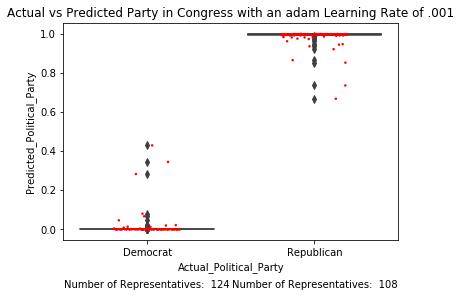

In [15]:
# Generate a boxplot to show the distribution of the predicted values vs the actual observed values, and also show the predictions with jitter 
ax = sns.boxplot(x = 'Actual_Political_Party', y = 'Predicted_Political_Party', data = Results150, order =['Democrat', 'Republican'])     # standard boxplot
ax = sns.stripplot(x = 'Actual_Political_Party', y = 'Predicted_Political_Party', data = Results150, order = ['Democrat', 'Republican'], color = 'red', jitter = 0.2, size = 2.5)   
                                                                                                                 # Add jitter to boxplot

# Add number of observations to the boxplot
nobs = Results150.groupby('Actual_Political_Party').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = [ 'Number of Representatives:  ' + i for i in nobs]


pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], -.3, nobs[tick], horizontalalignment='center', size = 'medium', color = 'black')
plt.title('Actual vs Predicted Party in Congress with an adam Learning Rate of .001')


# The model predicted with 100% accuracy the party affiliation.  There were no false positives or negatives according to the confusion matrix.  The boxplot indicates no data above 50% for Democrat and none below 50% for Republican which corresponds to the confusion matrix.

In [16]:
accuracy150 = model_epochdata.history['acc']    #  Assigns the accuracy numbers to a list
loss150 = model_epochdata.history['loss']       #  Assigns the loss numbers to a list

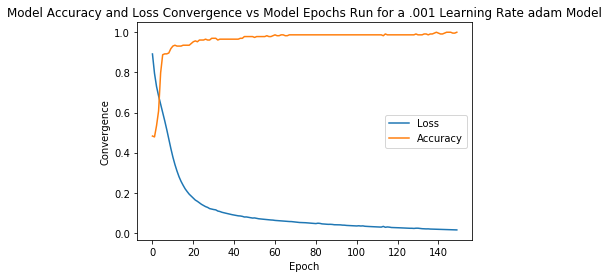

In [17]:
# Plot accuracy and loss vs epoch

plt.plot(loss150,label='Loss')
plt.plot(accuracy150, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy and Loss Convergence vs Model Epochs Run for a .001 Learning Rate adam Model")
plt.show()

# Re-run the model with .0001 learning rate.

In [18]:
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(20, input_dim = 16, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 16 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(12, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(8, activation = 'relu'))                 # Create next level of neural network with 4 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.0001)                               # Assign the optimizer algorithm to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate# Train the model over 150 epochs 
training_iteration = 150

# Fit the model
model_epochdata1500 = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores1500 = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict1500 = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores1500[1]*100))

rounded1500 = [round(i[0]) for i in Y_predict1500]
y_pred1500 = np.array(rounded1500,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred1500)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 543us/step

acc: 93.10%
Confusion Matrix
True negatives:  116
False negatives:  8
False positives:  8
True positives:  100


In [19]:
Y_predict1500 = pd.DataFrame(Y_predict1500)
Y_predict1500.columns = ['Predicted_Political_Party']

Results1500 = pd.concat([Y_observed, Y_predict1500], axis = 1)
sum(Results1500.Actual_Political_Party)                                   # Sanity check - expect 108 - there were originally 124 democrats with 232 records; therefore 108
                                                                         # republicans.  Since republicans were assigned 1 and democrats 0, this total should be 108.

108

In [20]:
# Convert the 1 to Republican and the 0 to Democrat in the Actual_Political_Party column
Results1500['Actual_Political_Party']=Results1500['Actual_Political_Party'].astype(str)
Results1500['Actual_Political_Party'].replace('1', 'Republican', inplace=True)
Results1500['Actual_Political_Party'].replace('0', 'Democrat', inplace=True)
#Results1500

Text(0.5, 1.0, 'Actual vs Predicted Party in Congress with an adam Learning Rate of .0001')

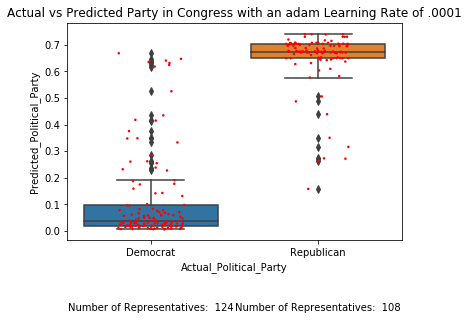

In [21]:
# Generate a boxplot to show the distribution of the predicted values vs the actual observed values, and also show the predictions with jitter 
ax = sns.boxplot(x = 'Actual_Political_Party', y = 'Predicted_Political_Party', data = Results1500, order =['Democrat', 'Republican'])     # standard boxplot
ax = sns.stripplot(x = 'Actual_Political_Party', y = 'Predicted_Political_Party', data = Results1500, order = ['Democrat', 'Republican'], color = 'red', jitter = 0.2, size = 2.5)   
                                                                                                                 # Add jitter to boxplot

# Add number of observations to the boxplot
nobs = Results1500.groupby('Actual_Political_Party').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = [ 'Number of Representatives:  ' + i for i in nobs]


pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], -.3, nobs[tick], horizontalalignment='center', size = 'medium', color = 'black')
plt.title('Actual vs Predicted Party in Congress with an adam Learning Rate of .0001')


# At the slower learning rate, the model takes longer to learn.  After 150 epochs, there are 16 people assigned to the wrong party - 8 Democrats and 8 Republicans.  This is evident from the boxplot and the confusion matrix.

In [22]:
accuracy1500 = model_epochdata1500.history['acc']    #  Assigns the accuracy numbers to a list
loss1500 = model_epochdata1500.history['loss']       #  Assigns the loss numbers to a list

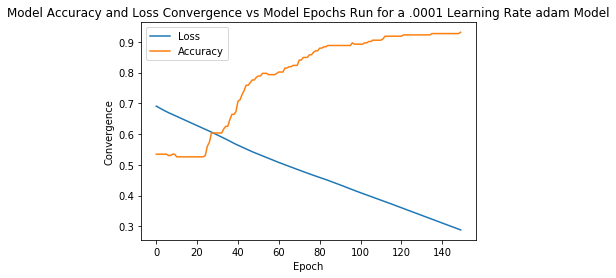

In [23]:
# Plot accuracy and loss vs epoch

plt.plot(loss1500,label='Loss')
plt.plot(accuracy1500, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy and Loss Convergence vs Model Epochs Run for a .0001 Learning Rate adam Model")
plt.show()

# Re-run the model with .01 learning rate.

In [24]:
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(20, input_dim = 16, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 16 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(12, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(8, activation = 'relu'))                 # Create next level of neural network with 4 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.01)                               # Assign the optimizer algorithm to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate# Train the model over 150 epochs 
training_iteration = 150

# Fit the model
model_epochdata15 = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores15 = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict15 = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores15[1]*100))

rounded15 = [round(i[0]) for i in Y_predict15]
y_pred15 = np.array(rounded15,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred15)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 612us/step

acc: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108


In [25]:
Y_predict15 = pd.DataFrame(Y_predict15)
Y_predict15.columns = ['Predicted_Political_Party']

Results15 = pd.concat([Y_observed, Y_predict15], axis = 1)
sum(Results15.Actual_Political_Party)                                   # Sanity check - expect 108 - there were originally 124 democrats with 232 records; therefore 108
                                                                         # republicans.  Since republicans were assigned 1 and democrats 0, this total should be 108.

108

In [26]:
# Convert the 1 to Republican and the 0 to Democrat in the Actual_Political_Party column
Results15['Actual_Political_Party']=Results15['Actual_Political_Party'].astype(str)
Results15['Actual_Political_Party'].replace('1', 'Republican', inplace=True)
Results15['Actual_Political_Party'].replace('0', 'Democrat', inplace=True)
#Results15

Text(0.5, 1.0, 'Actual vs Predicted Party in Congress with an adam Learning Rate of .01')

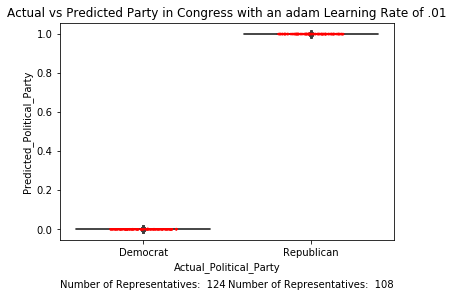

In [27]:
# Generate a boxplot to show the distribution of the predicted values vs the actual observed values, and also show the predictions with jitter 
ax = sns.boxplot(x = 'Actual_Political_Party', y = 'Predicted_Political_Party', data = Results15, order =['Democrat', 'Republican'])     # standard boxplot
ax = sns.stripplot(x = 'Actual_Political_Party', y = 'Predicted_Political_Party', data = Results15, order = ['Democrat', 'Republican'], color = 'red', jitter = 0.2, size = 2.5)   
                                                                                                                 # Add jitter to boxplot

# Add number of observations to the boxplot
nobs = Results15.groupby('Actual_Political_Party').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = [ 'Number of Representatives:  ' + i for i in nobs]


pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], -.3, nobs[tick], horizontalalignment='center', size = 'medium', color = 'black')
plt.title('Actual vs Predicted Party in Congress with an adam Learning Rate of .01')


# The model using the .01 learning rate learned quickly and correctly classified each person with 100% accuracy according to the boxplot.  Let's see what the statistics say.

In [28]:
accuracy15 = model_epochdata15.history['acc']    #  Assigns the accuracy numbers to a list
loss15 = model_epochdata15.history['loss']       #  Assigns the loss numbers to a list

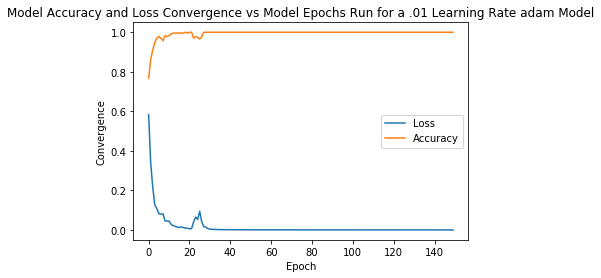

In [29]:
# Plot accuracy and loss vs epoch

plt.plot(loss15,label='Loss')
plt.plot(accuracy15, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy and Loss Convergence vs Model Epochs Run for a .01 Learning Rate adam Model")
plt.show()

# Accuracy plot shows 100% accuracy as well.

# Plot the loss in one plot and the accuracy in another for all three learning rates.

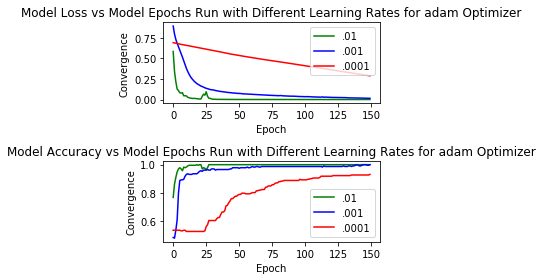

In [30]:
plt.subplot(2,1,1)
plt.plot(loss15, label = '.01', color = 'green')
plt.plot(loss150,label='.001', color = 'blue')
plt.plot(loss1500, label = '.0001', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Loss vs Model Epochs Run with Different Learning Rates for adam Optimizer")

plt.subplot(2,1,2)
plt.plot(accuracy15, label = '.01', color = 'green')
plt.plot(accuracy150, label='.001', color = 'blue')
plt.plot(accuracy1500, label = '.0001', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy vs Model Epochs Run with Different Learning Rates for adam Optimizer")
plt.tight_layout()
plt.show()

# In the model created, as the learning rate increases, the loss decreases quicker; but it does level off at a point.  Also as the learning rate increases, the accuracy increases faster; but it does converge on 100% at a point.